# Check the SNR of events in the CBC catalog

In [1]:
# import bilby
# bilby.version

ModuleNotFoundError: No module named 'bilby'

In [1]:
smallPath = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalog_csvs/BBHs_0,aligned,sampledPlusSNR.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

smallDF = pd.read_csv(smallPath)

In [2]:
len(np.where(smallDF["Network SNR"] > 9)[0]) / len(smallDF) * 100

12.98435

In [4]:
len(np.where(smallDF["minimum individual SNR"] > 2)[0]) / len(smallDF) * 100

31.149759999999997

In [5]:
len(
    np.where(
        np.logical_and(
            smallDF["Network SNR"] > 9, smallDF["minimum individual SNR"] > 2
        )
        == True
    )[0]
) / len(smallDF) * 100

12.03449

### Ok, so 7.9% of CBCs in this catalog meet the 8 network, minimum 2 individual SNR requirement. 

That's pretty good!

In [7]:
len(
    np.where(
        np.logical_and(
            smallDF["Network SNR"] > 9, smallDF["minimum individual SNR"] > 2
        )
        == True
    )[0]
) / len(smallDF) * 100

12.03449

In [6]:
len(
    np.where(
        np.logical_and(
            smallDF["Network SNR"] > 10, smallDF["minimum individual SNR"] > 2
        )
        == True
    )[0]
) / len(smallDF) * 100

9.8415

### 5% for SNR 10 is great!

In [8]:
# snr8Indices = np.argwhere(np.logical_and(smallDF["Network SNR"]>8,smallDF["Individual SNR minimum"]>2)==True).T[0]
# snr9Indices = np.argwhere(np.logical_and(smallDF["Network SNR"]>9,smallDF["Individual SNR minimum"]>2)==True).T[0]
# snr10Indices = np.argwhere(np.logical_and(smallDF["Network SNR"]>10,smallDF["Individual SNR minimum"]>2)==True).T[0]

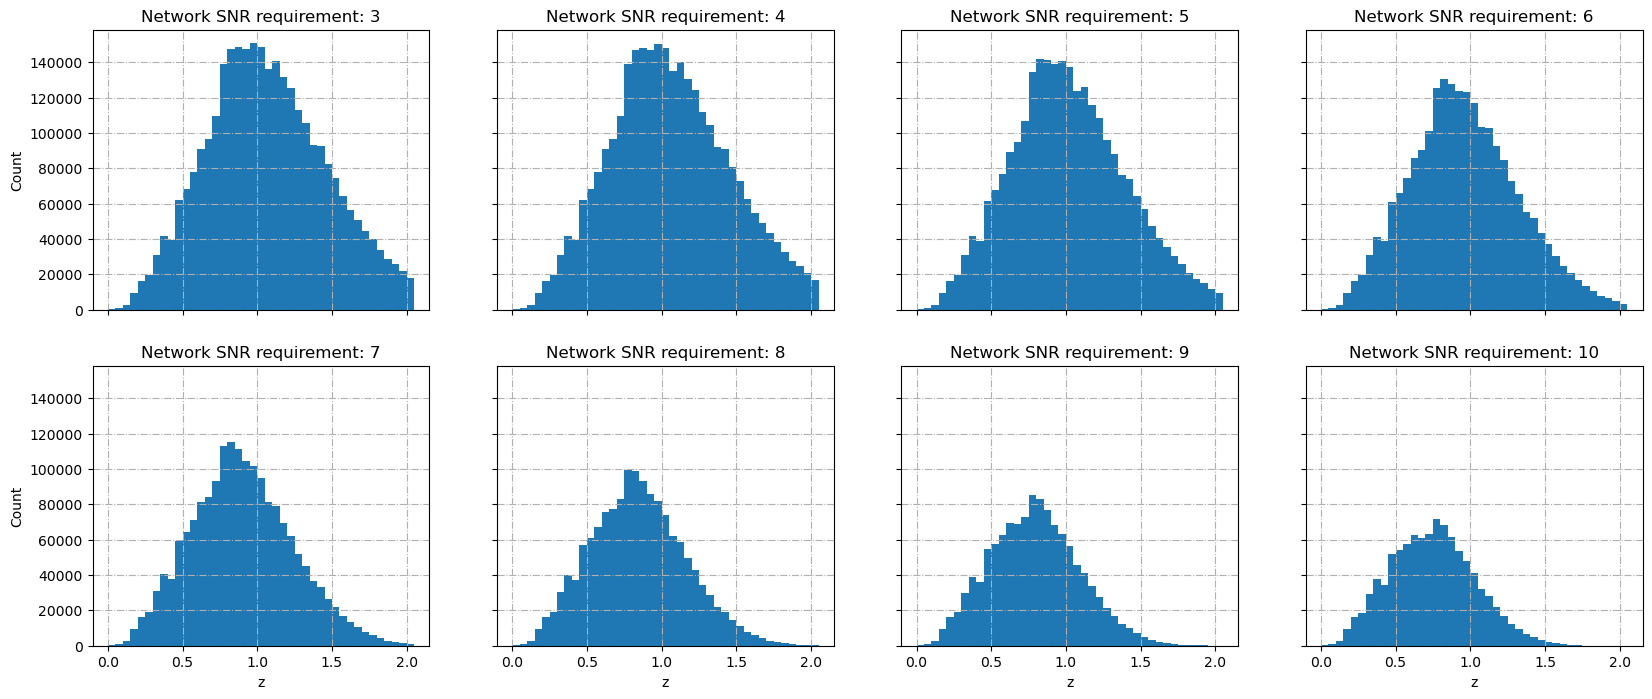

In [9]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=[20, 8])
for ind, ax in zip(np.arange(3, 11), axs.flatten()):
    myInd = np.argwhere(
        np.logical_and(
            smallDF["Network SNR"] > ind, smallDF["minimum individual SNR"] > 2
        )
        == True
    ).T[0]
    subsample = smallDF.loc[myInd]
    ax.hist(subsample["redshiftHubble"], bins=np.arange(0, 2.1, step=0.05))
    ax.set_title("Network SNR requirement: {}".format(ind))
    ax.grid(ls="-.")
for ax in axs[-1, :]:
    ax.set_xlabel("z")
for ax in axs[:, 0]:
    ax.set_ylabel("Count")

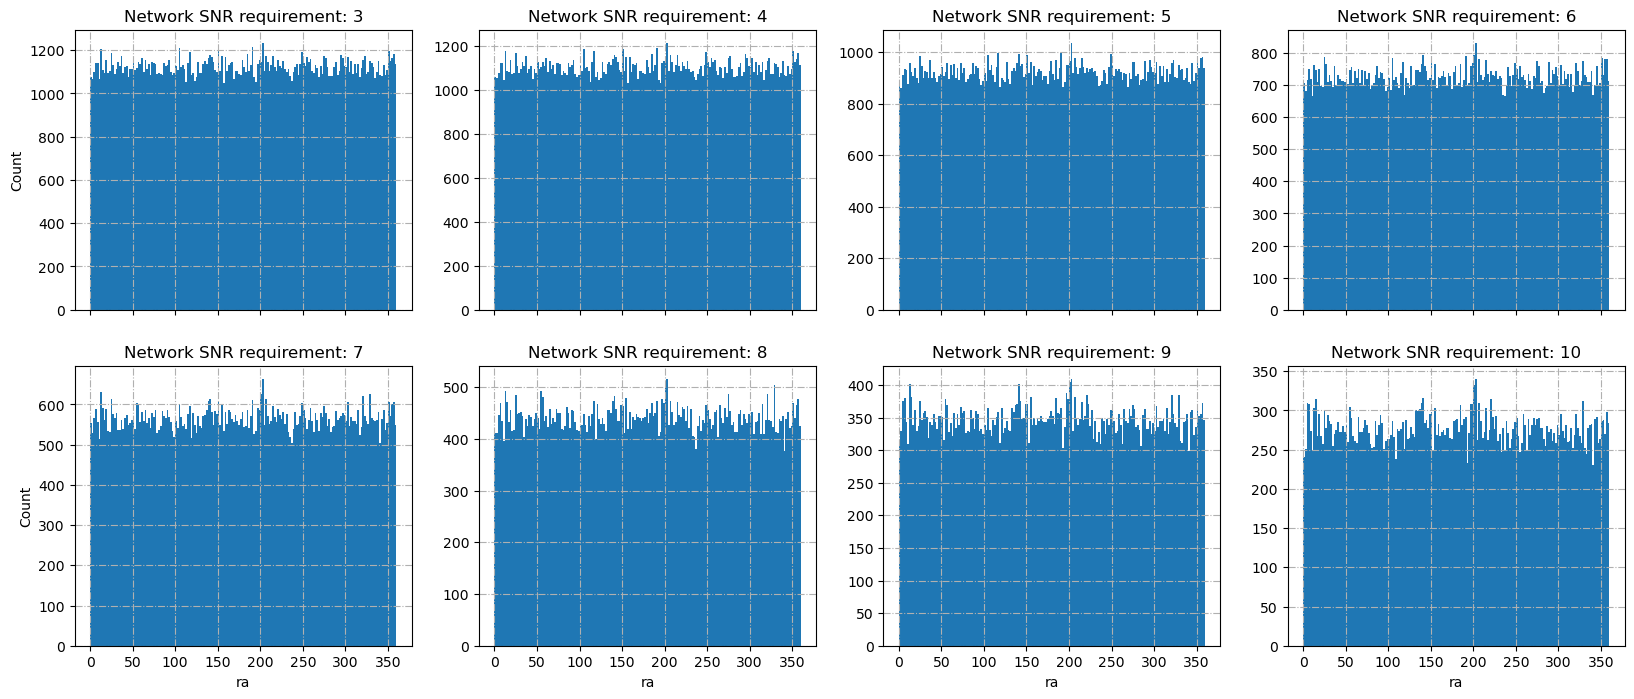

In [82]:
fig, axs = plt.subplots(2, 4, sharex=True, figsize=[20, 8])
for ind, ax in zip(np.arange(3, 11), axs.flatten()):
    myInd = np.argwhere(
        np.logical_and(
            smallDF["Network SNR"] > ind, smallDF["Individual SNR minimum"] > 2
        )
        == True
    ).T[0]
    subsample = smallDF.loc[myInd]
    ax.hist(subsample["mra"], bins=np.arange(0, 360.1, step=2))
    ax.set_title("Network SNR requirement: {}".format(ind))
    ax.grid(ls="-.")
for ax in axs[-1, :]:
    ax.set_xlabel("ra")
for ax in axs[:, 0]:
    ax.set_ylabel("Count")

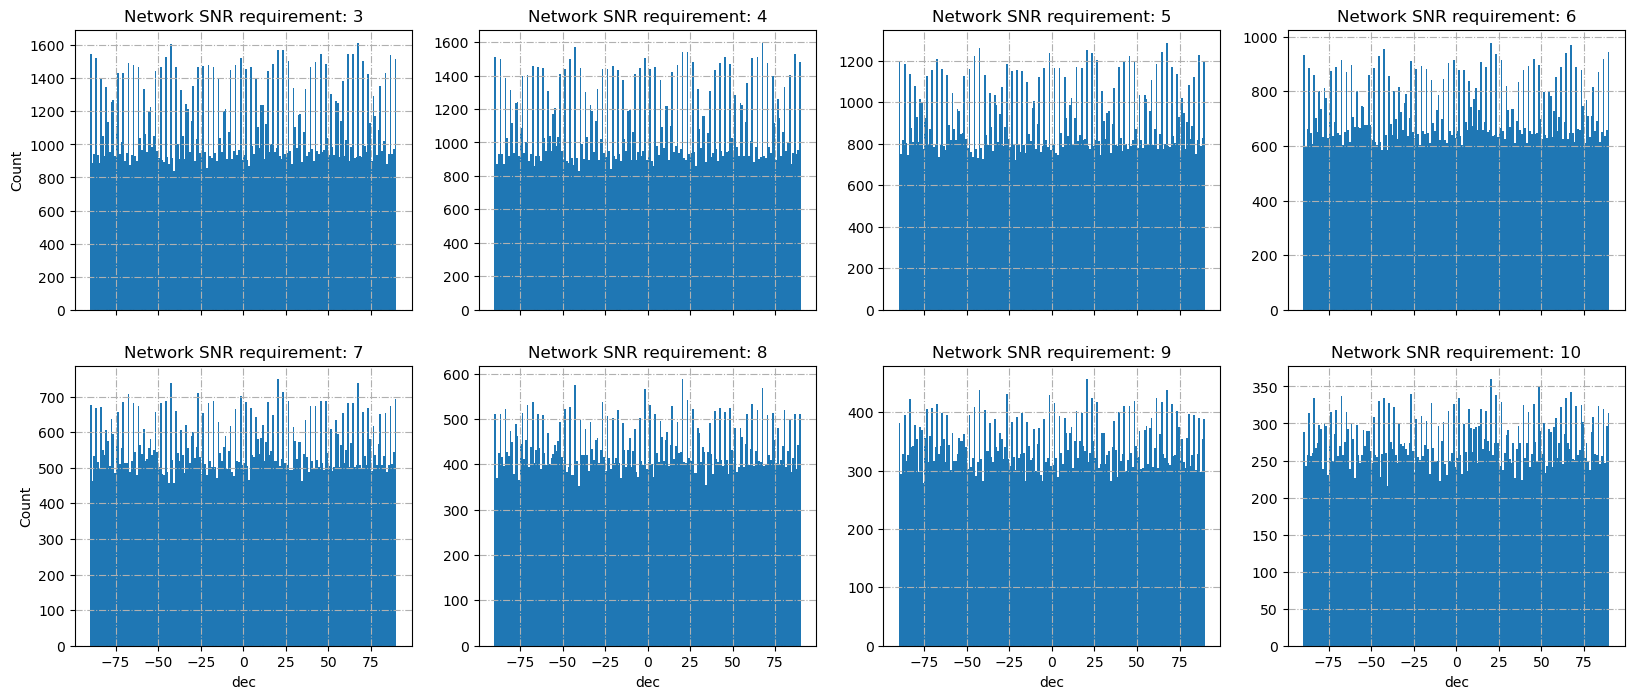

In [83]:
fig, axs = plt.subplots(2, 4, sharex=True, figsize=[20, 8])
for ind, ax in zip(np.arange(3, 11), axs.flatten()):
    myInd = np.argwhere(
        np.logical_and(
            smallDF["Network SNR"] > ind, smallDF["Individual SNR minimum"] > 2
        )
        == True
    ).T[0]
    subsample = smallDF.loc[myInd]
    ax.hist(subsample["mdec"], bins=np.arange(-90, 90.1, step=1))
    ax.set_title("Network SNR requirement: {}".format(ind))
    ax.grid(ls="-.")
for ax in axs[-1, :]:
    ax.set_xlabel("dec")
for ax in axs[:, 0]:
    ax.set_ylabel("Count")

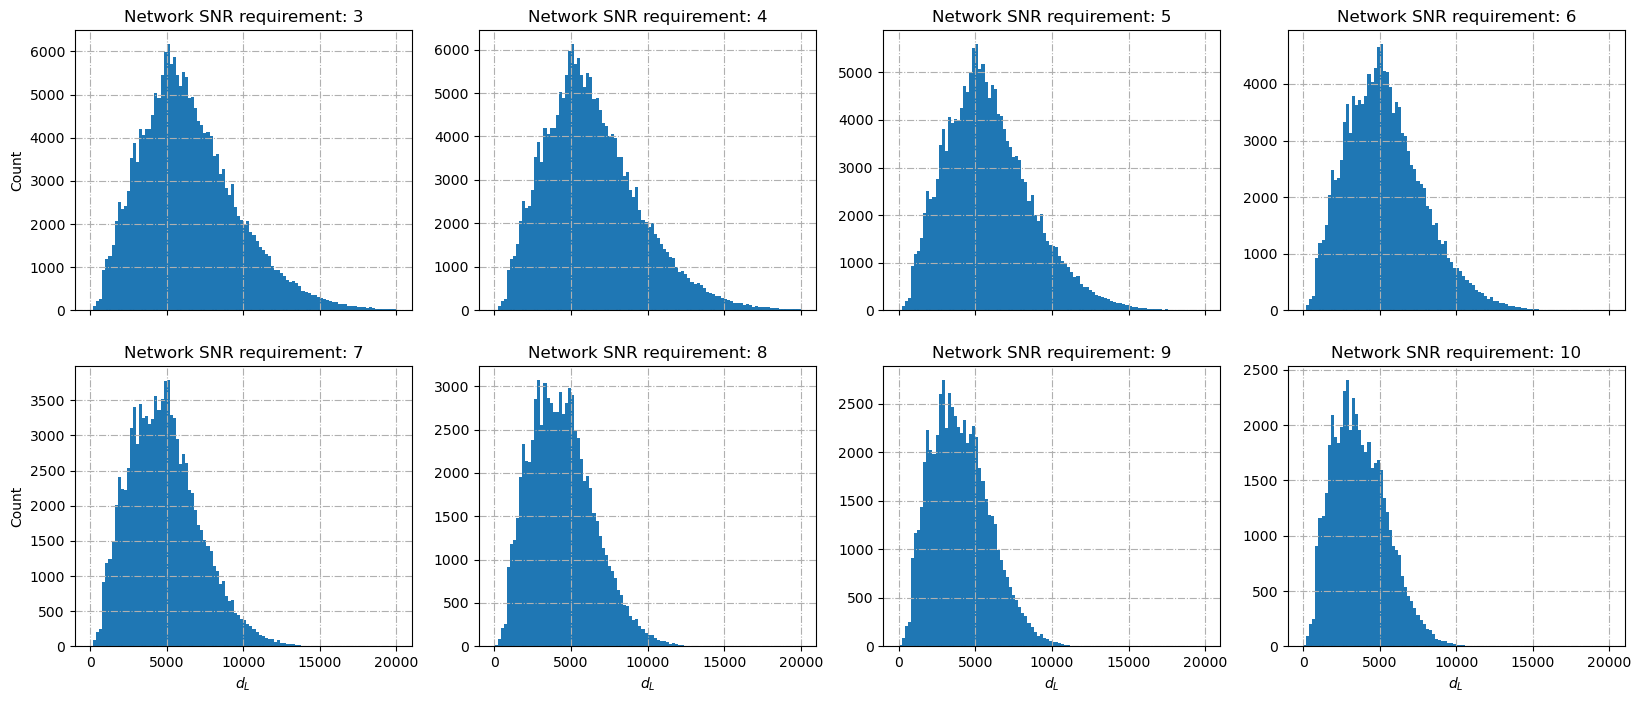

In [12]:
fig, axs = plt.subplots(2, 4, sharex=True, figsize=[20, 8])
for ind, ax in zip(np.arange(3, 11), axs.flatten()):
    myInd = np.argwhere(
        np.logical_and(
            smallDF["Network SNR"] > ind, smallDF["Individual SNR minimum"] > 2
        )
        == True
    ).T[0]
    subsample = smallDF.loc[myInd]
    ax.hist(subsample["luminosity_distance"], bins=np.arange(0, 20001, step=200))
    ax.set_title("Network SNR requirement: {}".format(ind))
    ax.grid(ls="-.")
for ax in axs[-1, :]:
    ax.set_xlabel(r"$d_L$")
for ax in axs[:, 0]:
    ax.set_ylabel("Count")

In [11]:
# len(np.where(smallDF["Network SNR"]>9)[0])

In [16]:
bb.prio

,galaxyID,redshiftHubble,ra,dec,mra,mdec,mass_ratio,chirp_mass,luminosity_distance,theta_jn,psi,phase,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,Individual SNR minimum,Network SNR
0,10070200392465,2.787557,62.770779,-40.208431,172.823600,81.175717,0.784843,39.682598,23772.324284,1.470373,1.527574,6.111981,0.212367,0.924589,2.056307,1.538877,3.996148,5.284360,0.163240,0.376542
1,9814202166423,2.044943,62.394007,-37.236766,105.784619,41.289369,0.734108,65.747680,16252.753222,2.109578,2.587883,3.453603,0.569492,0.373157,1.799021,1.756383,1.602352,0.582240,0.420378,2.760435
2,10072100184865,1.834209,67.617224,-41.572680,241.762863,70.242273,0.496394,38.488675,14204.132784,0.446852,0.968015,1.227379,0.846142,0.460867,1.157485,1.211003,5.459455,1.385960,1.459841,2.876833
3,9816101164643,1.442409,66.938860,-36.626004,330.745078,-75.967953,0.830846,27.164701,10528.900213,1.544962,0.527480,0.915036,0.975962,0.591477,0.870990,1.903603,4.174135,5.098213,0.885004,2.060347
4,10070201792402,2.190634,61.436562,-41.042127,92.144000,-15.350534,0.588188,52.531755,17693.717694,0.870132,1.262305,0.295705,0.131235,0.189865,2.363448,1.695189,4.381864,4.531333,0.127530,1.307172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,10450101208010,1.435337,68.072960,-46.354699,309.861134,28.528358,0.904816,81.366434,10464.424991,1.661303,1.841819,4.483587,0.397964,0.825445,2.778606,0.812033,0.026667,2.791771,0.527166,1.506850
999996,9686101859930,1.115703,62.722171,-35.363638,199.277924,43.354578,0.806583,62.704688,7634.337758,1.212355,1.487383,0.540498,0.394093,0.380944,1.351863,1.442118,5.396874,1.606512,1.710627,5.663118
999997,10198100729664,1.624585,63.947168,-41.072617,254.927392,-53.865419,0.858758,37.984952,12213.869886,2.203670,1.740654,2.041428,0.214294,0.310846,2.760485,0.735742,1.010924,5.963968,0.637617,3.119561
999998,10071102123701,1.025592,64.389561,-40.703905,196.208747,85.264949,0.217823,33.333007,6870.398373,0.903281,1.388654,0.728124,0.542695,0.727033,1.712242,1.987625,1.386559,5.978017,1.056353,2.465016
